# EDA STROKE ICTUS

### ESTUDIO DE ICTUS 

In [1]:
# Librerías estándar de análisis de datos
import numpy as np
import pandas as pd
import pylab 
import scipy.stats as stats

# Librerías de visualización
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
# Una variable para la ruta, buenas prácticas
path_to_data = "./stroke_dataset.csv"
#===============================================
# Importamos el dataset
df = pd.read_csv(path_to_data)

#### VARIABLES DECLARADAS
<ul><li><b>gender</b> : género
<li><b>age</b> : edad</li>
<li><b>hypertension</b> : hipertensión</li>
<li><b>heart_disease</b> : enfermo del corazón</li>
<li><b>ever_married</b> : alguna vez casada</li>
<li><b>work_type</b> : funcionaria, autónoma, empresa privada, niños </li>
<li><b>Residence_type</b> : Tipo de residencia, rural o urbano</li>
<li><b>avg_glucose_level</b> : porcentaje de glucosa </li> 
<li><b>bmi</b> : índice de masa corporal.</li>
<li><b>smoking_status</b> : hábito de fumar</li> 
<li><b>stroke</b> : ictus</li>
</ul>    

In [3]:
# VISUALIZAMOS LAS 5 PRIMERAS FILAS
#===============================================
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [4]:
# VISUALIZAMOS LAS 5 ÚLTIMAS FILAS
#===============================================
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0
4980,Female,80.0,1,0,Yes,Private,Urban,83.75,29.1,never smoked,0


In [5]:
#CONTAMOS FILAS Y COLUMNAS
#===============================================
df.shape

(4981, 11)

##### 4981 FILAS y 11 COLUMNAS

In [6]:
# INFORMACIÓN DEL DATASET 
#===============================================
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


## OJO!!! 

In [7]:
# PASAMOS A BOLEANOS LAS SIGUIENTES VARIABLES PARA MEJOR TRATAMIENTO DE LOS DATOS
# =============================================
df["hypertension"] = df["hypertension"].astype(bool)
df["heart_disease"] = df["heart_disease"].astype(bool)
df["stroke"] = df["stroke"].astype(bool)
# OTRA FORMA DE HACERLO QUE DEBERÍA FUNCIONAR TAMBIÉN 
# =============================================
# df[["stroke", "hypertension", "heart_disease"]].astype(bool)

In [8]:
#Convertimos ever_married en booleana
#Primero cambiamos Yes y No a TRue y False
d = {'Yes': True, 'No': False}
df['ever_married']=df['ever_married'].map(d)

In [9]:
df["ever_married"] = df["ever_married"].astype(bool)

In [10]:
#Convertimos gender en booleana
#Primero cambiamos Yes y No a TRue y False
dd = {'Male': True, 'Female': False}
df['gender']=df['gender'].map(dd)

In [11]:
df["gender"] = df["gender"].astype(bool)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   bool   
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   bool   
 3   heart_disease      4981 non-null   bool   
 4   ever_married       4981 non-null   bool   
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   bool   
dtypes: bool(5), float64(3), object(3)
memory usage: 257.9+ KB


## Balanceo de variable Target

In [13]:
# PARA VER BALANCEO DE LA VARIABLE TARGET STROKE
df["stroke"].value_counts()

False    4733
True      248
Name: stroke, dtype: int64

<AxesSubplot:ylabel='stroke'>

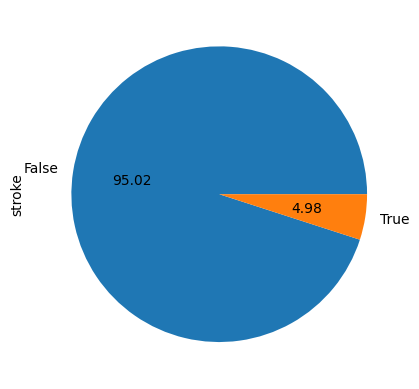

In [14]:
df["stroke"].value_counts().plot.pie(autopct = '%.2f')

##### LA VARIABLE ESTÁ MUY DESEQUILIBRADA

In [15]:
#VISUALIZACIÓN DE NULOS TOTALES EN CADA VARIABLE
#===============================================
df.isnull().sum(axis = 0)

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

##### NI UN SOLO VALOR PERDIDO

In [16]:
# ANÁLISIS ESTADÍSTICO BÁSICO
#===============================================
df.describe()

,age,avg_glucose_level,bmi
count,4981.000000,4981.000000,4981.000000
mean,43.419859,105.943562,28.498173
std,22.662755,45.075373,6.790464
min,0.080000,55.120000,14.000000
25%,25.000000,77.230000,23.700000
50%,45.000000,91.850000,28.100000
75%,61.000000,113.860000,32.600000
max,82.000000,271.740000,48.900000


In [17]:
categoricass = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status", "hypertension", "heart_disease", "stroke"]
numericass = ["age", "avg_glucose_level", "bmi"]

Una variable puede ser de dos tipos:
* __Categórica__: Es una variable que puede tomar un valor de un conjunto de valores limitados, asociados a una cualidad del dato y sin un orden lógico. Estas a su vez pueden ser:
    - __Binarias__: Pueden tomar uno de dos valores. Se suelen denominar clase positiva y clase negativa. Suelen representarse como Verdadero o Falso, y como 0 o 1, pese a lo cual no deben ser confundidas con variables numéricas
    - __Politómicas__: Pueden tomar más de dos valores.   
* __Numérica__: Son aquellas que vienen representadas por un número, que dependen de un orden lógico y con las que se pueden hacer operaciones aritméticas. A su vez, pueden ser de dos tipos:
    - __Continuas__: Entre dos valores dados, podemos encontrar infinitos valores
    - __Discretas__: Cuando entre dos valores dados, no puede tomar valores intermedios

In [18]:
df[categoricass].describe()

,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease,stroke
count,4981,4981,4981,4981,4981,4981,4981,4981
unique,2,2,4,2,4,2,2,2
top,False,True,Private,Urban,never smoked,False,False,False
freq,2907,3280,2860,2532,1838,4502,4706,4733


In [19]:
#CONTEO DE VALORES EN LAS VARIABLES CATEGÓRICAS
#===============================================
for col in categoricass:
    print(f"Column name: {col}")
    print(df[col].value_counts())
    print()

Column name: gender
False    2907
True     2074
Name: gender, dtype: int64

Column name: ever_married
True     3280
False    1701
Name: ever_married, dtype: int64

Column name: work_type
Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64

Column name: Residence_type
Urban    2532
Rural    2449
Name: Residence_type, dtype: int64

Column name: smoking_status
never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64

Column name: hypertension
False    4502
True      479
Name: hypertension, dtype: int64

Column name: heart_disease
False    4706
True      275
Name: heart_disease, dtype: int64

Column name: stroke
False    4733
True      248
Name: stroke, dtype: int64



In [20]:
#DATOS DUPLICADOS 
#===============================================
df_duplicadas = df[df.duplicated()]
len(df_duplicadas)

0

<h2> GRÁFICOS RELEVANTES</h2>
    

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='avg_glucose_level', ylabel='age'>,
        <AxesSubplot:xlabel='bmi', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>,
        <AxesSubplot:xlabel='avg_glucose_level', ylabel='avg_glucose_level'>,
        <AxesSubplot:xlabel='bmi', ylabel='avg_glucose_level'>],
       [<AxesSubplot:xlabel='age', ylabel='bmi'>,
        <AxesSubplot:xlabel='avg_glucose_level', ylabel='bmi'>,
        <AxesSubplot:xlabel='bmi', ylabel='bmi'>]], dtype=object)

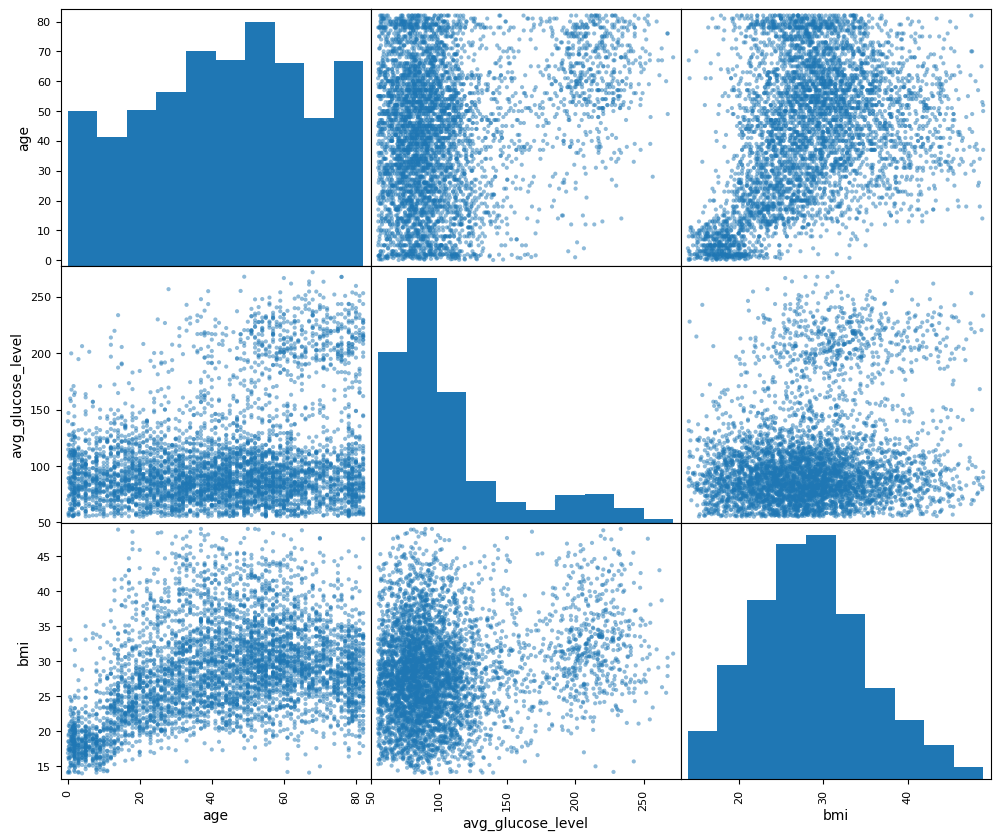

In [21]:
#PARA VER LA CORRELACIÓN ENTRE LAS VARIABLES
#===============================================
pd.plotting.scatter_matrix(df[numericass], figsize=(12,10))

In [22]:
 df.corr()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke
gender,1.000000,-0.026538,0.021485,0.086476,-0.028971,0.055796,-0.012093,0.008870
age,-0.026538,1.000000,0.278120,0.264852,0.677137,0.236763,0.373703,0.246478
hypertension,0.021485,0.278120,1.000000,0.111974,0.164534,0.170028,0.158762,0.131965
heart_disease,0.086476,0.264852,0.111974,1.000000,0.114765,0.166847,0.060926,0.134610
ever_married,-0.028971,0.677137,0.164534,0.114765,1.000000,0.150724,0.371690,0.108398
avg_glucose_level,0.055796,0.236763,0.170028,0.166847,0.150724,1.000000,0.186348,0.133227
bmi,-0.012093,0.373703,0.158762,0.060926,0.371690,0.186348,1.000000,0.056926
stroke,0.008870,0.246478,0.131965,0.134610,0.108398,0.133227,0.056926,1.000000


<AxesSubplot:>

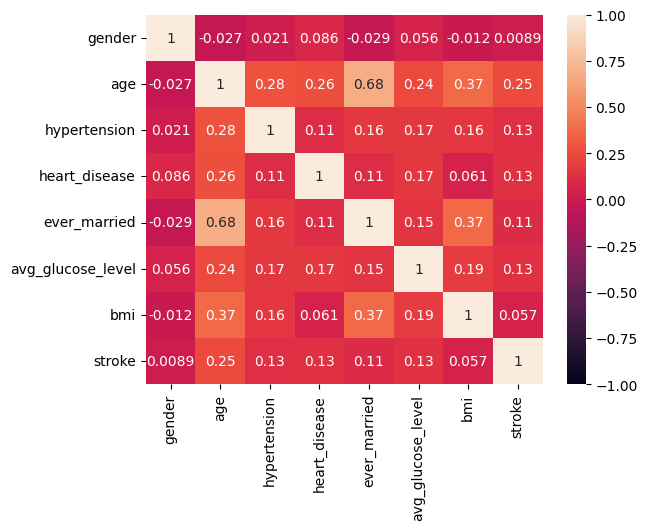

In [23]:
# A partir de la tabla de correlación, obtenemos el mapa de calor 
#===============================================
sns.heatmap(df.corr(), vmin=-1., vmax=1., annot=True)

<AxesSubplot:>

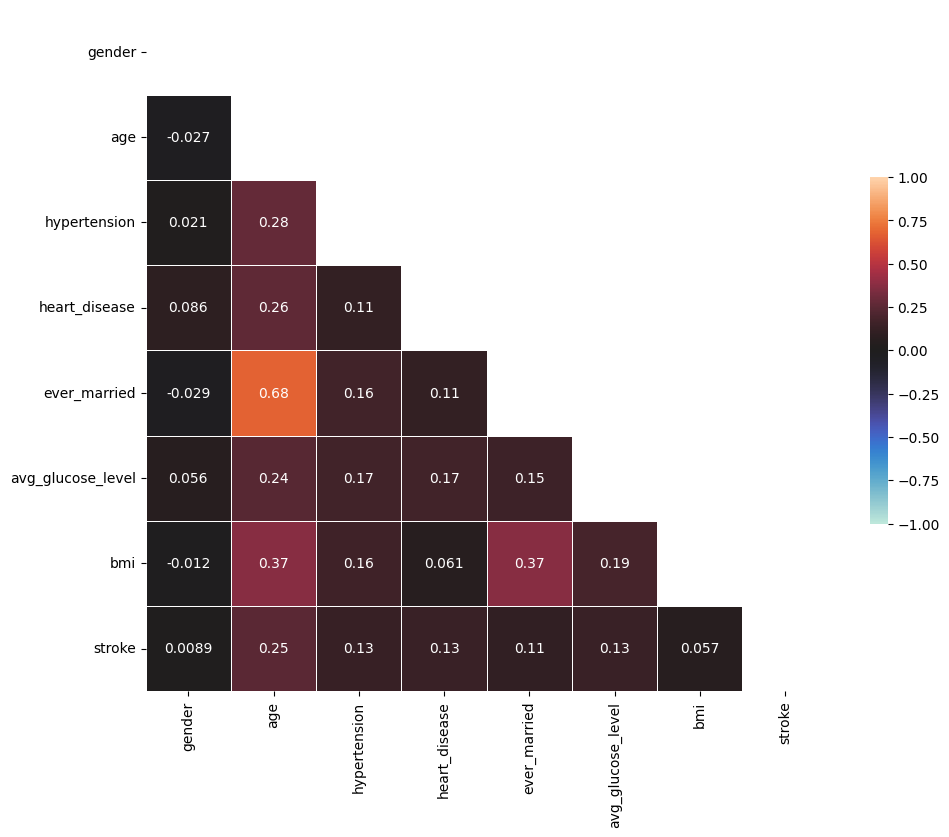

In [24]:
# Ahora igual pero más bonito
#===========================================================================
# Generamos una máscara para no duplicar lops valores
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
#===========================================================================
# Configuramos el matplotlib
f, ax = plt.subplots(figsize=(11, 9))
#===========================================================================
# Ploteamos el heatmap
sns.heatmap(df.corr(), mask=mask, vmax=1., vmin=-1., center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

##### BAJA CORRELACIÓN ENTRE LAS VARIABLES COMO TAMBIÉN HABÍAMOS APRECIADO EN LA TABLA Y GRÁFICO ANTERIOR.

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>],
       [<AxesSubplot:title={'center':'bmi'}>, <AxesSubplot:>]],
      dtype=object)

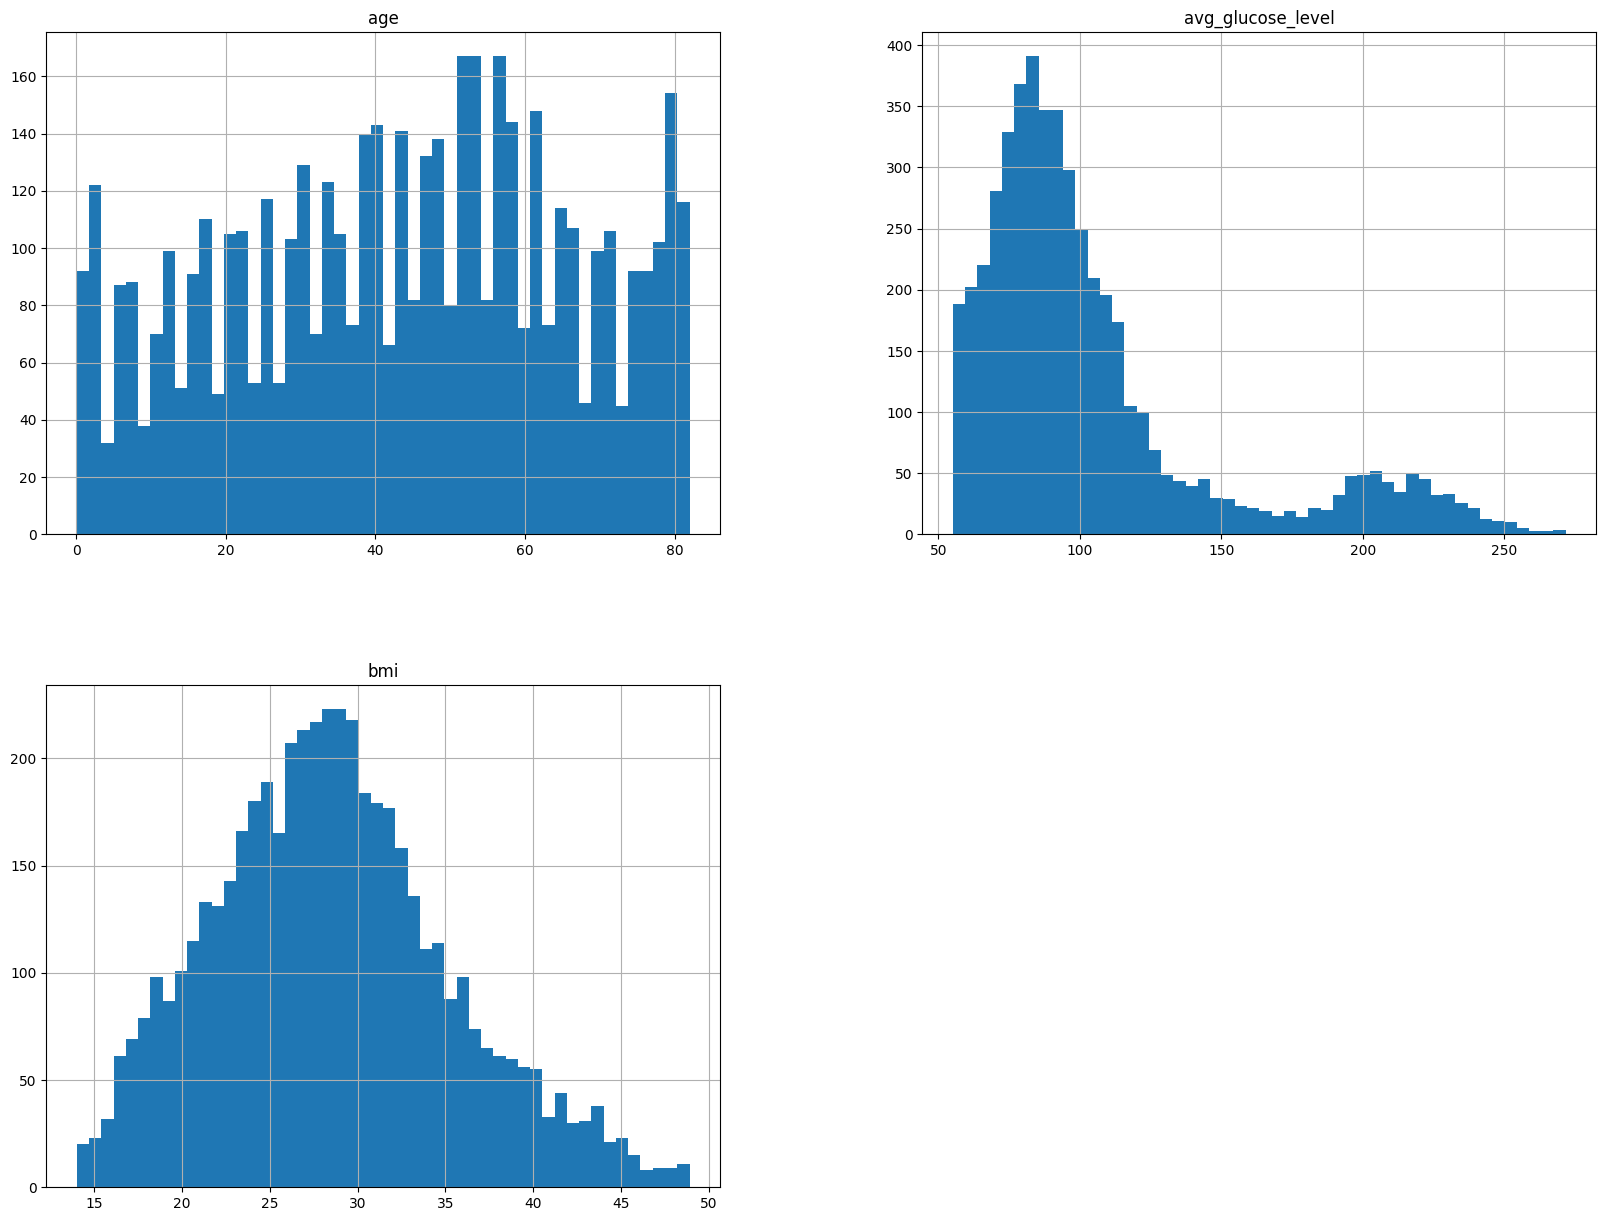

In [25]:
# HISTOGRAMAS DE LAS VARIABLES NUMÉRICAS PARA VER SUS DISTRIBUCIONES
df[numericass].hist(bins=50, figsize=(20,15))

##### LAS VARIABLES AGE, AVG_GLUCOSE_LEVEL Y BMI TIENEN DISTRIBUCIONES NORMALES

<AxesSubplot:xlabel='age', ylabel='Count'>

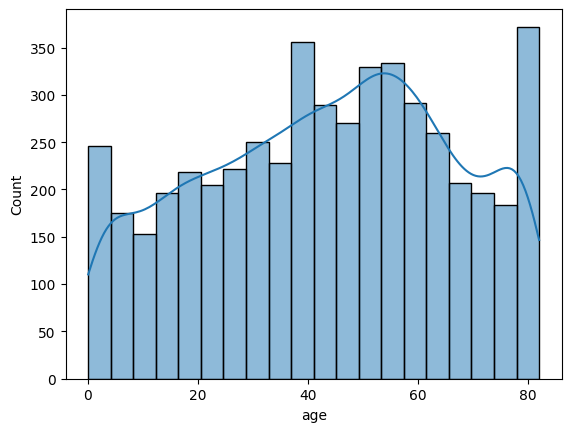

In [26]:
sns.histplot(data=df, x="age", kde=True)

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

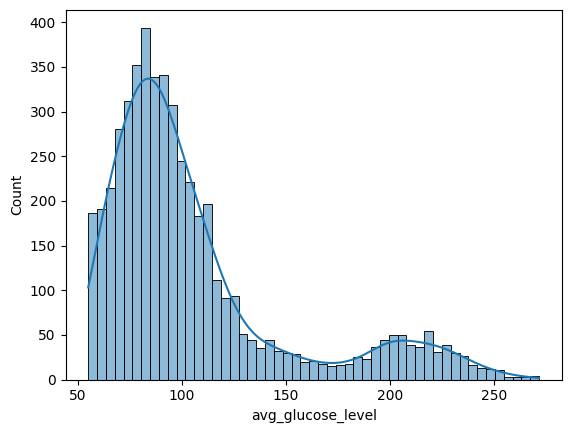

In [27]:
sns.histplot(data=df, x="avg_glucose_level", kde=True)

<AxesSubplot:xlabel='bmi', ylabel='Count'>

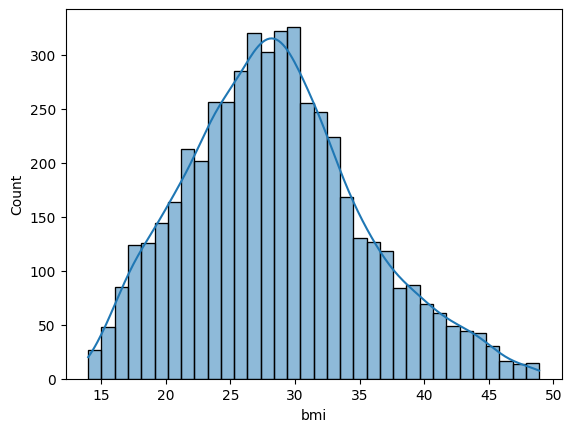

In [28]:
sns.histplot(data=df, x="bmi", kde=True)

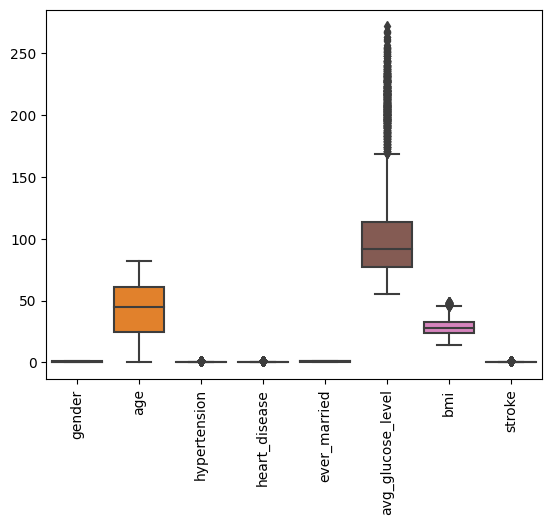

In [29]:
# Observamos los outlers de las variables numéricas
# =======================================================
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [30]:
#Comprobar cuántos valores perdemos si nos quedamos con menores de 45 en bmi
# ===================================================================
len(df[df["bmi"]>45])

65

<AxesSubplot:xlabel='bmi', ylabel='age'>

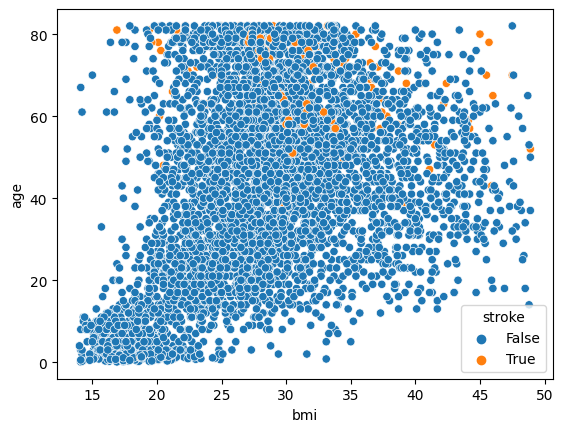

In [31]:
# VISUALIZAMOS LAS VARIABLES
sns.scatterplot(data=df, x="bmi", y="age", hue="stroke")

## OJO!!!! REVISAR ESTA VARIABLE POR SI EL MODELO NO FUESE CORRECTO

<AxesSubplot:xlabel='bmi'>

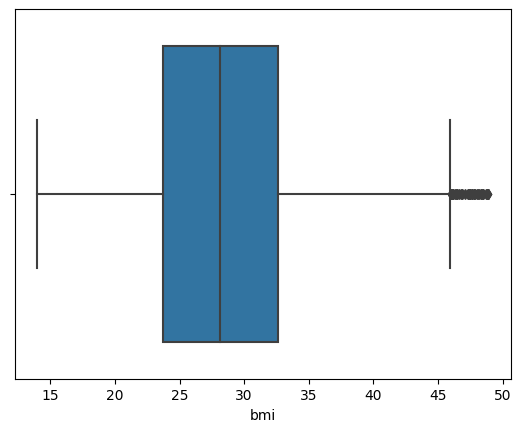

In [32]:
# VISUALIZACIÓN DE LA VARIABLE BMI Y SUS POSIBLES OUTLIERS
# =======================================================
df["bmi"].skew()
sns.boxplot(x=df["bmi"])

<AxesSubplot:xlabel='age'>

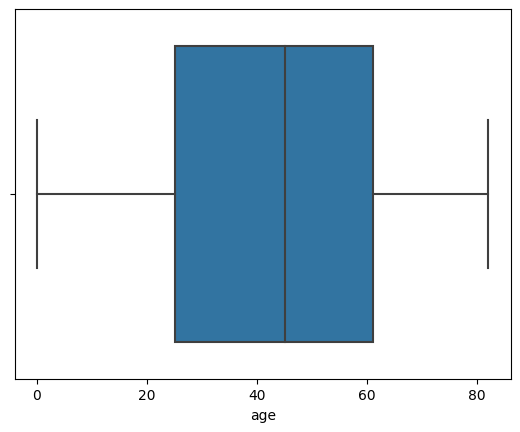

In [33]:
# VISUALIZACIÓN DE LA VARIABLE AGE
# =======================================================
df["age"].skew()
sns.boxplot(x=df["age"])

<AxesSubplot:xlabel='avg_glucose_level'>

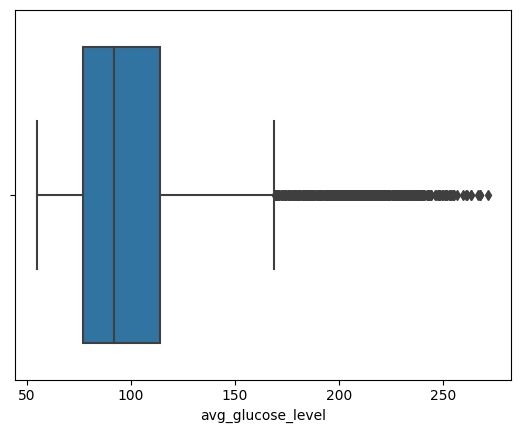

In [34]:
# VISUALIZACIÓN DE LA VARIABLE avg_glucose_level
# =======================================================
df["avg_glucose_level"].skew()
sns.boxplot(x=df["avg_glucose_level"])

<AxesSubplot:xlabel='avg_glucose_level'>

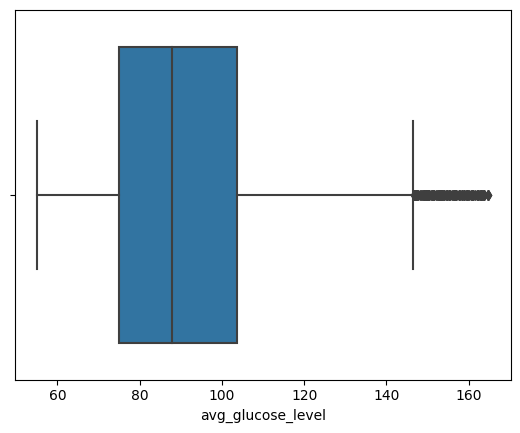

In [35]:
sns.boxplot(x= df[(df["avg_glucose_level"]<165 )]["avg_glucose_level"])

## INGENIERÍA DE CARACTERÍSTICAS

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

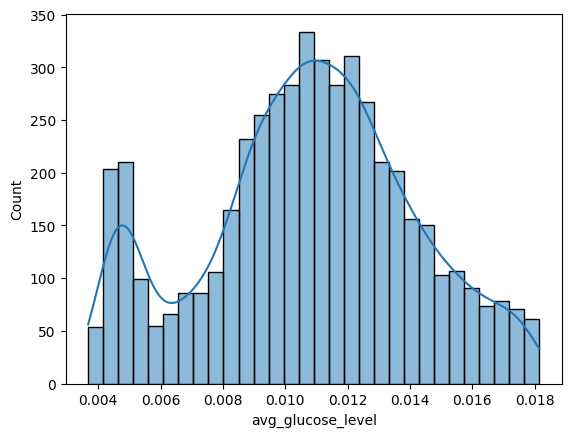

In [36]:
reciprocal_avg_glucose_level = 1/df["avg_glucose_level"]
df["reciprocal_avg_glucose_level"] = reciprocal_avg_glucose_level
sns.histplot(x=reciprocal_avg_glucose_level, kde=True)

((array([-3.63470665, -3.39932754, -3.26959543, ...,  3.26959543,
          3.39932754,  3.63470665]),
  array([0.00367999, 0.00373469, 0.00373678, ..., 0.0181061 , 0.01810938,
         0.01814224])),
 (0.0033355025567940624, 0.010750946955177384, 0.990625613792121))

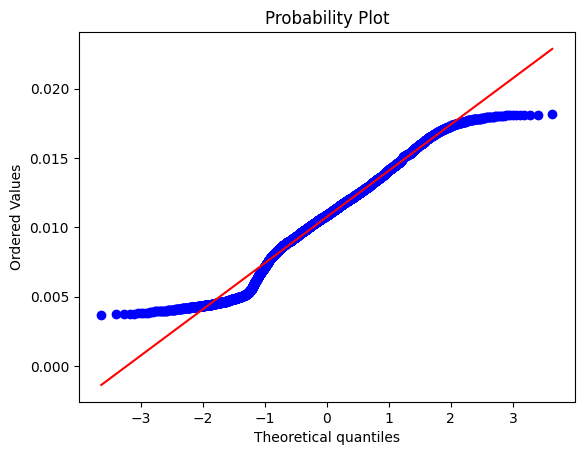

In [37]:
stats.probplot(reciprocal_avg_glucose_level, plot=pylab)

In [38]:
df=df.drop(['avg_glucose_level'], axis=1)

# Preparación

In [39]:
#Separamos la variable a predecir "price" estan separadas pero siguen linkadas por el índice
X = df.drop("stroke", axis=1)
y = df["stroke"]

In [40]:
categoricas = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status", "hypertension", "heart_disease"]
numericas = ["age", "reciprocal_avg_glucose_level", "bmi"]

## Random Undersampling

In [41]:
#pip install imbalanced-learn

In [42]:
#Instalar libreria imbalance-learn e importar
from imblearn.under_sampling import RandomUnderSampler

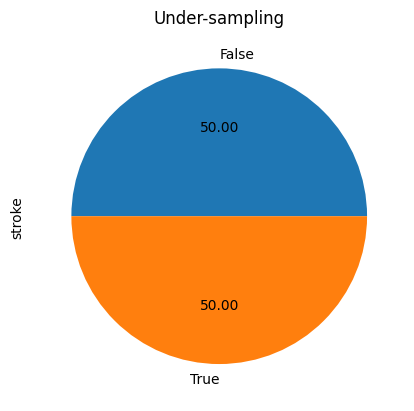

In [43]:
#Resampleamos, quitamos de la muestra que más hay (stroke = 0)
 #hasta igualar de lo que menos muestra hay (stroke = 1) 
#----------------------------------------------------

rus = RandomUnderSampler(sampling_strategy=1) # Para valores numéricos
#rus = RandomUnderSampler(sampling_strategy= not minority) # Para String

X_res, y_res = rus.fit_resample(X,y)

ax = y_res.value_counts().plot.pie(autopct = '%.2f') 
_ = ax.set_title("Under-sampling")

#### Tenemos X_res y_res, que son las muestras resampleadas, las cuales usaremos para el modelo predictivo. Ahora "stroke" está balanceada, pero tenemos muchos menos datos. Hemos pasado de 4981 a 496.

In [44]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,bmi,smoking_status,stroke,reciprocal_avg_glucose_level
0,True,67.0,False,True,True,Private,Urban,36.6,formerly smoked,True,0.004373
1,True,80.0,False,True,True,Private,Rural,32.5,never smoked,True,0.009441
2,False,49.0,False,False,True,Private,Urban,34.4,smokes,True,0.005840
3,False,79.0,True,False,True,Self-employed,Rural,24.0,never smoked,True,0.005743
4,True,81.0,False,False,True,Private,Urban,29.0,formerly smoked,True,0.005370
...,...,...,...,...,...,...,...,...,...,...,...
4976,True,41.0,False,False,False,Private,Rural,29.8,formerly smoked,False,0.014255
4977,True,40.0,False,False,True,Private,Urban,31.1,smokes,False,0.005231
4978,False,45.0,True,False,True,Govt_job,Rural,31.8,smokes,False,0.010524
4979,True,40.0,False,False,True,Private,Rural,30.0,smokes,False,0.011913


In [45]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
transformer_numerico = ("transformer_numerico", MinMaxScaler(), numericas)
transformer_categorico = ("transformer_categorico", OneHotEncoder(), categoricas)

transformer = ColumnTransformer([transformer_numerico, transformer_categorico], remainder="passthrough")

#### Recordemos que usaremos X_res y y_res

In [46]:
X_res = transformer.fit_transform(X_res)

In [47]:
pd.DataFrame(X_res, columns = transformer.get_feature_names_out())

,transformer_numerico__age,transformer_numerico__reciprocal_avg_glucose_level,transformer_numerico__bmi,transformer_categorico__gender_False,transformer_categorico__gender_True,transformer_categorico__ever_married_False,transformer_categorico__ever_married_True,transformer_categorico__work_type_Govt_job,transformer_categorico__work_type_Private,transformer_categorico__work_type_Self-employed,...,transformer_categorico__Residence_type_Rural,transformer_categorico__Residence_type_Urban,transformer_categorico__smoking_status_Unknown,transformer_categorico__smoking_status_formerly smoked,transformer_categorico__smoking_status_never smoked,transformer_categorico__smoking_status_smokes,transformer_categorico__hypertension_False,transformer_categorico__hypertension_True,transformer_categorico__heart_disease_False,transformer_categorico__heart_disease_True
0,0.718964,0.371187,0.610465,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.242424,0.969322,0.200581,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.755621,0.598133,0.369186,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.523460,0.673013,0.171512,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.694526,0.555646,0.712209,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,0.963343,0.355893,0.369186,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
492,0.902248,0.162873,0.412791,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
493,0.926686,0.093587,0.500000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
494,0.902248,0.899356,0.395349,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


----------------- sin unbalancedlearn

In [48]:
X = transformer.fit_transform(X)

In [49]:
pd.DataFrame(X, columns = transformer.get_feature_names_out())

,transformer_numerico__age,transformer_numerico__reciprocal_avg_glucose_level,transformer_numerico__bmi,transformer_categorico__gender_False,transformer_categorico__gender_True,transformer_categorico__ever_married_False,transformer_categorico__ever_married_True,transformer_categorico__work_type_Govt_job,transformer_categorico__work_type_Private,transformer_categorico__work_type_Self-employed,...,transformer_categorico__Residence_type_Rural,transformer_categorico__Residence_type_Urban,transformer_categorico__smoking_status_Unknown,transformer_categorico__smoking_status_formerly smoked,transformer_categorico__smoking_status_never smoked,transformer_categorico__smoking_status_smokes,transformer_categorico__hypertension_False,transformer_categorico__hypertension_True,transformer_categorico__heart_disease_False,transformer_categorico__heart_disease_True
0,0.816895,0.047900,0.647564,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.975586,0.398354,0.530086,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.597168,0.149362,0.584527,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0.963379,0.142660,0.286533,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.987793,0.116876,0.429799,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,0.499512,0.731227,0.452722,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4977,0.487305,0.107280,0.489971,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4978,0.548340,0.473240,0.510029,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4979,0.487305,0.569295,0.458453,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


# Entrenamiento

## Modelo balanceado con imblearn

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, train_size=0.5, random_state = 42)

In [51]:
#Algoritmos de clasificación

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [52]:
#Métricas de los algoritmos

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

In [53]:
def train_evaluate(nombre_modelo, modelo):
    mod = modelo(max_depth=4, max_features='auto', n_estimators=500)
    mod.fit(X_train, y_train)
    
    y_predict = mod.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_predict)
    auc = roc_auc_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    precision = precision_score(y_test, y_predict)
    confusionmatrix = confusion_matrix(y_test, y_predict)
    
    y_pred_train = mod.predict(X_train)
    
    accuracy_train = accuracy_score(y_train, y_pred_train)
    auc_train = roc_auc_score(y_train, y_pred_train)
    recall_train = recall_score(y_train, y_pred_train)
    precision_train = precision_score(y_train, y_pred_train)
    confusionmatrix_train = confusion_matrix(y_train, y_pred_train)
    
    overfitting_accuracy = accuracy - accuracy_train
    overfitting_precision = precision - precision_train
    overfitting_recall = precision - precision_train
    
    print(nombre_modelo)
    print()
    print(f"Accuracy: {accuracy}")
    print(f"RocAUC: {auc}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(f"ConfusionMatrix: {confusionmatrix}")
    print()  
    
    print(nombre_modelo)
    print()
    print(f"Accuracy_train: {accuracy_train}")
    print(f"RocAUC_train: {auc_train}")
    print(f"Recall_train: {recall_train}")
    print(f"Precision_train: {precision_train}")
    print(f"ConfusionMatrix_train: {confusionmatrix_train}")
    print() 
    print(f"El porcentaje de overfitting según accuracy es: {overfitting_accuracy*100}%")
    print(f"El porcentaje de overfitting según accuracy es: {overfitting_precision*100}%")
    print(f"El porcentaje de overfitting según accuracy es: {overfitting_recall*100}%")

## Modelo desbalanceado

#### Aplicamos la estrategia class_weight, para penalizar el modelo y adaptarlo al desbalanceo

In [54]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, train_size=0.7, random_state = 42)

In [55]:
def train_evaluate_unbalance(nombre_modelo, modelo):
    mod = modelo(class_weight='balanced', max_depth=4, max_features='auto', n_estimators=500) #aquí modificamos penalizacion
    mod.fit(X_tr, y_tr)
    
    y_pred = mod.predict(X_te)
    
    accuracy_im = accuracy_score(y_te, y_pred)
    auc_im = roc_auc_score(y_te, y_pred)
    recall_im = recall_score(y_te, y_pred)
    precision_im = precision_score(y_te, y_pred)
    confusionmatrix_im = confusion_matrix(y_te, y_pred)
    
    y_pre_train = mod.predict(X_tr)
    
    accuracy_train_im = accuracy_score(y_tr, y_pre_train)
    auc_train_im = roc_auc_score(y_tr, y_pre_train)
    recall_train_im = recall_score(y_tr, y_pre_train)
    precision_train_im = precision_score(y_tr, y_pre_train)
    confusionmatrix_train_im = confusion_matrix(y_tr, y_pre_train)
    
    overfitting_accuracy_im = accuracy_im - accuracy_train_im
    overfitting_precision_im = precision_im - precision_train_im
    overfitting_recall_im = precision_im - precision_train_im
    
    print(nombre_modelo + "_" + "imbalanceado")
    print()
    print(f"Accuracy: {accuracy_im}")
    print(f"RocAUC: {auc_im}")
    print(f"Recall: {recall_im}")
    print(f"Precision: {precision_im}")
    print(f"ConfusionMatrix: {confusionmatrix_im}")
    print()  
    
    print(nombre_modelo + "_" + "imbalanceado")
    print()
    print(f"Accuracy_train: {accuracy_train_im}")
    print(f"RocAUC_train: {auc_train_im}")
    print(f"Recall_train: {recall_train_im}")
    print(f"Precision_train: {precision_train_im}")
    print(f"ConfusionMatrix_train: {confusionmatrix_train_im}")
    print() 
    print(f"El porcentaje de overfitting según accuracy es: {overfitting_accuracy_im*100}%")
    print(f"El porcentaje de overfitting según accuracy es: {overfitting_precision_im*100}%")
    print(f"El porcentaje de overfitting según accuracy es: {overfitting_recall_im*100}%")

In [56]:
train_evaluate("RandomForestClassifier", RandomForestClassifier)

/home/perseis/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier

Accuracy: 0.7782258064516129
RocAUC: 0.7802083333333334
Recall: 0.8416666666666667
Precision: 0.7372262773722628
ConfusionMatrix: [[ 92  36]
 [ 19 101]]

RandomForestClassifier

Accuracy_train: 0.8024193548387096
RocAUC_train: 0.79921875
Recall_train: 0.8984375
Precision_train: 0.7615894039735099
ConfusionMatrix_train: [[ 84  36]
 [ 13 115]]

El porcentaje de overfitting según accuracy es: -2.4193548387096753%
El porcentaje de overfitting según accuracy es: -2.4363126601247176%
El porcentaje de overfitting según accuracy es: -2.4363126601247176%


In [57]:
train_evaluate_unbalance("RandomForestClassifier", RandomForestClassifier)

/home/perseis/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier_imbalanceado

Accuracy: 0.7083612040133779
RocAUC: 0.7613502705245825
Recall: 0.8205128205128205
Precision: 0.13168724279835392
ConfusionMatrix: [[995 422]
 [ 14  64]]

RandomForestClassifier_imbalanceado

Accuracy_train: 0.7062535857716581
RocAUC_train: 0.7842084722912083
Recall_train: 0.8705882352941177
Precision_train: 0.12869565217391304
ConfusionMatrix_train: [[2314 1002]
 [  22  148]]

El porcentaje de overfitting según accuracy es: 0.21076182417197886%
El porcentaje de overfitting según accuracy es: 0.29915906244408763%
El porcentaje de overfitting según accuracy es: 0.29915906244408763%


## RandomSearch

In [58]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

In [59]:
model = RandomForestClassifier()

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']}

In [60]:
randm = RandomizedSearchCV(estimator=model, param_distributions = param_grid,
                               cv = 2, n_iter = 10, n_jobs=-1)
randm.fit(X_train, y_train)

print(" Results from Random Search " )
print("The best estimator across ALL searched params:", randm.best_estimator_)
print("The best score across ALL searched params:", randm.best_score_)
print("The best parameters across ALL searched params:", randm.best_params_)

/home/perseis/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/perseis/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/perseis/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

 Results from Random Search 
The best estimator across ALL searched params: RandomForestClassifier(max_depth=5, n_estimators=200)
The best score across ALL searched params: 0.7379032258064516
The best parameters across ALL searched params: {'n_estimators': 200, 'max_features': 'sqrt', 'max_depth': 5, 'criterion': 'gini'}


scikitplot

In [61]:
#pip install scikit-plot

In [62]:
#import scikitplot as skplnb


In [63]:
#nb = GaussianNB()
#nb = nb.fit(X_train, y_train)
#y_probas = nb.predict_proba(X_test)
#skplt.metrics.plot_roc(y_test, y_probas)
#matplotlib.axes._subplots.AxesSubplotobject at 0x7fe967d64490
#plt.show() 

## XGradientBoost para datos imbalanceados

In [64]:
#pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [65]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(


In [66]:
# define model
modelx = XGBClassifier(scale_pos_weight=99)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(modelx, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.5f' % mean(scores))

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resource

Mean ROC AUC: 0.78655
